In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models, Input
import numpy as np
import matplotlib.pyplot as plt
import os
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, Input
import numpy as np
import matplotlib.pyplot as plt
import os
from tensorflow.keras.preprocessing.image import load_img, img_to_array

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48376 (\N{HANGUL SYLLABLE BON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48120 (\N{HANGUL SYLLABLE MI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


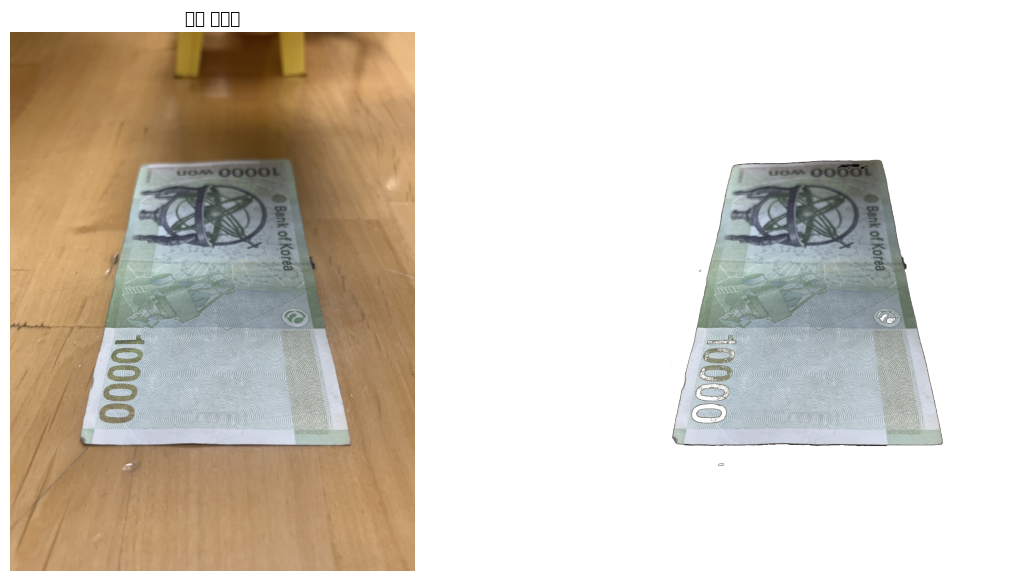

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

image_path = "/content/drive/MyDrive/24-2 딥러닝 텀프로젝트/data/photo_right/right119.jpg"
image = cv2.imread(image_path)

# 이미지를 색 공간으로
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# 배경 갈색
lower_brown = np.array([10, 50, 50])
upper_brown = np.array([30, 255, 255])

# 지폐 초록
lower_green = np.array([35, 50, 50])
upper_green = np.array([85, 255, 255])


mask_brown = cv2.inRange(hsv, lower_brown, upper_brown)
mask_green = cv2.inRange(hsv, lower_green, upper_green)
mask = cv2.bitwise_or(mask_brown, mask_green)

# 지폐 내부 갈색
lower_internal_brown = np.array([5, 30, 30])
upper_internal_brown = np.array([20, 180, 180])

mask_internal_brown = cv2.inRange(hsv, lower_internal_brown, upper_internal_brown)

# 배경 제거
mask_inv = cv2.bitwise_not(mask)

#지폐내부 갈색, 수정 필요
result = cv2.bitwise_and(image, image, mask=mask_inv)
result = cv2.bitwise_and(result, result, mask=cv2.bitwise_not(mask_internal_brown))

# 윤곽선
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
_, binary = cv2.threshold(gray, 1, 255, cv2.THRESH_BINARY)
contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# 가장 큰 윤곽선
if contours:
    largest_contour = max(contours, key=cv2.contourArea)
    x, y, w, h = cv2.boundingRect(largest_contour)

    # 직사각형 영역만 유지
    #result[y:y+h, x:x+w] = image[y:y+h, x:x+w]

    # 알파 채널 추가하여 투명 배경
    b, g, r = cv2.split(result)
    alpha = mask_inv
    result_rgba = cv2.merge((b, g, r, alpha))

    # 결과 출력
    plt.figure(figsize=(14, 7))

    # 원본 이미지
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title("원본 이미지")

    # 결과 이미지
    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(result_rgba, cv2.COLOR_BGRA2RGBA))
    plt.axis('off')
    plt.show()
else:
    print(".")


In [17]:
'''
import cv2
import numpy as np
import os

def process_image(image_path, output_path):
    image = cv2.imread(image_path)
    if image is None:
        print(f"이미지 로드 실패: {image_path}")
        return

    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    lower_brown = np.array([10, 50, 50])
    upper_brown = np.array([30, 255, 255])

    lower_green = np.array([35, 50, 50])
    upper_green = np.array([85, 255, 255])

    mask_brown = cv2.inRange(hsv, lower_brown, upper_brown)
    mask_green = cv2.inRange(hsv, lower_green, upper_green)

    mask = cv2.bitwise_or(mask_brown, mask_green)


    lower_internal_brown = np.array([5, 30, 30])
    upper_internal_brown = np.array([20, 180, 180])

    mask_internal_brown = cv2.inRange(hsv, lower_internal_brown, upper_internal_brown)


    mask_inv = cv2.bitwise_not(mask)

    result = cv2.bitwise_and(image, image, mask=mask_inv)
    result = cv2.bitwise_and(result, result, mask=cv2.bitwise_not(mask_internal_brown))

    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    _, binary = cv2.threshold(gray, 1, 255, cv2.THRESH_BINARY)
    contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    if contours:
        largest_contour = max(contours, key=cv2.contourArea)
        x, y, w, h = cv2.boundingRect(largest_contour)

        result[y:y+h, x:x+w] = image[y:y+h, x:x+w]


    b, g, r = cv2.split(result)
    alpha = mask_inv
    result_rgba = cv2.merge((b, g, r, alpha))


    output_path_png = os.path.splitext(output_path)[0] + '.png'


    if not os.path.exists(output_path_png):
        cv2.imwrite(output_path_png, result_rgba)
        print(f"이미지 저장 완료: {output_path_png}")
    else:
        print(f"파일 이미 존재: {output_path_png}")


def process_folder(input_folder, output_folder):
    for root, dirs, files in os.walk(input_folder):

        new_folder = root.replace(input_folder, output_folder, 1)

        if not os.path.exists(new_folder):
            os.makedirs(new_folder)


        for file in files:
            if file.endswith(('.jpg', '.jpeg', '.png')):
                image_path = os.path.join(root, file)
                output_path = os.path.join(new_folder, file)
                process_image(image_path, output_path)


input_folder = "/content/drive/MyDrive/24-2 딥러닝 텀프로젝트/data"
output_folder = "/content/drive/MyDrive/24-2 딥러닝 텀프로젝트/data/new_data"

for folder in ['photo_right', 'photo_middle', 'photo_left', 'Fake_photo_right', 'Fake_photo_middle', 'Fake_photo_left']:
    process_folder(os.path.join(input_folder, folder), os.path.join(output_folder, folder))
'''

이미지 저장 완료: /content/drive/MyDrive/24-2 딥러닝 텀프로젝트/data/new_data/photo_right/right1.png
이미지 저장 완료: /content/drive/MyDrive/24-2 딥러닝 텀프로젝트/data/new_data/photo_right/right34.png
이미지 저장 완료: /content/drive/MyDrive/24-2 딥러닝 텀프로젝트/data/new_data/photo_right/right35.png
이미지 저장 완료: /content/drive/MyDrive/24-2 딥러닝 텀프로젝트/data/new_data/photo_right/right33.png
이미지 저장 완료: /content/drive/MyDrive/24-2 딥러닝 텀프로젝트/data/new_data/photo_right/right2.png
이미지 저장 완료: /content/drive/MyDrive/24-2 딥러닝 텀프로젝트/data/new_data/photo_right/right38.png
이미지 저장 완료: /content/drive/MyDrive/24-2 딥러닝 텀프로젝트/data/new_data/photo_right/right3.png
이미지 저장 완료: /content/drive/MyDrive/24-2 딥러닝 텀프로젝트/data/new_data/photo_right/right5.png
이미지 저장 완료: /content/drive/MyDrive/24-2 딥러닝 텀프로젝트/data/new_data/photo_right/right4.png
이미지 저장 완료: /content/drive/MyDrive/24-2 딥러닝 텀프로젝트/data/new_data/photo_right/right36.png
이미지 저장 완료: /con

In [18]:
base_path2 = "/content/drive/MyDrive/24-2 딥러닝 텀프로젝트/data/new_data"

In [19]:
def load_data(base_path2, img_size=(512, 512)):
    data = []
    angle_folders = ["photo_right", "photo_left", "photo_middle"]

    for folder in angle_folders:
        folder_path2 = os.path.join(base_path2, folder)
        print(f"Loading images from: {folder_path2}")  # 경로 확인
        images = []
        for filename in sorted(os.listdir(folder_path2)):
            if filename.endswith(('.png', '.jpg', '.jpeg')):
                img_path = os.path.join(folder_path2, filename)

                img = load_img(img_path, color_mode="rgba", target_size=img_size)
                img_array = img_to_array(img) / 255.0
                images.append(img_array)
        data.append(np.array(images))

    return data




data = load_data(base_path2)

Loading images from: /content/drive/MyDrive/24-2 딥러닝 텀프로젝트/data/new_data/photo_right
Loading images from: /content/drive/MyDrive/24-2 딥러닝 텀프로젝트/data/new_data/photo_left
Loading images from: /content/drive/MyDrive/24-2 딥러닝 텀프로젝트/data/new_data/photo_middle


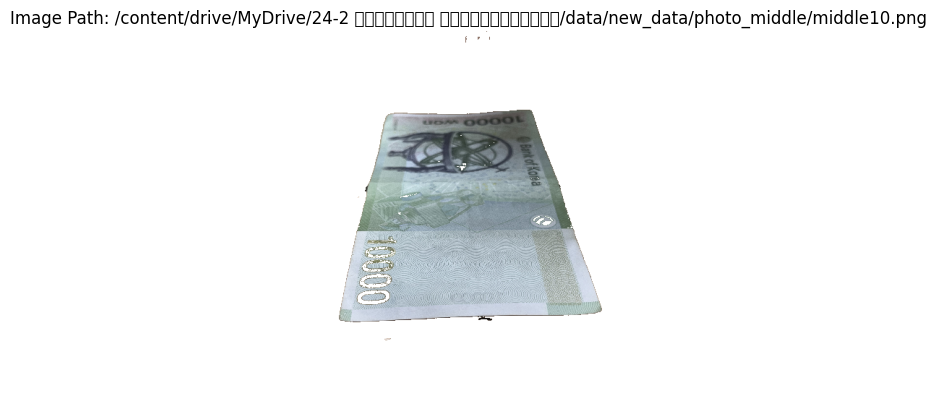

In [20]:
def get_image_path(base_path, folder_name, index):
    folder_path = os.path.join(base_path, folder_name)
    files = sorted(os.listdir(folder_path))
    return os.path.join(folder_path, files[index])

# 입력 예시
sample = data[0][1]
folder_name = "photo_middle"
image_path = get_image_path(base_path2, folder_name, 1)

plt.imshow(sample)
plt.axis('off')
plt.title(f"Image Path: {image_path}")
plt.show()


In [21]:
from tensorflow.keras import layers, models, Input
import tensorflow as tf
import numpy as np

def build_generator(latent_dim):
    model = models.Sequential([
        layers.Dense(64 * 64 * 128, activation='relu', input_dim=latent_dim),
        layers.Reshape((64, 64, 128)),
        layers.Conv2DTranspose(128, (4, 4), strides=(2, 2), padding='same', activation='relu'),
        layers.Conv2DTranspose(64, (4, 4), strides=(2, 2), padding='same', activation='relu'),
        layers.Conv2DTranspose(4, (4, 4), strides=(2, 2), padding='same', activation='tanh')
    ])
    return model

def build_discriminator(img_shape):
    model = models.Sequential([
        layers.Conv2D(64, (4, 4), strides=(2, 2), padding='same', input_shape=img_shape),
        layers.LeakyReLU(alpha=0.2),
        layers.Conv2D(128, (4, 4), strides=(2, 2), padding='same'),
        layers.LeakyReLU(alpha=0.2),
        layers.Conv2D(256, (4, 4), strides=(2, 2), padding='same'),
        layers.LeakyReLU(alpha=0.2),
        layers.Flatten(),
        layers.Dense(1, activation='sigmoid')
    ])
    return model

# 독립 GAN
class IndependentGAN:
    def __init__(self, img_shape, latent_dim):
        self.latent_dim = latent_dim
        self.generator = build_generator(latent_dim)
        self.discriminator = build_discriminator(img_shape)

        self.discriminator.compile(
            loss='binary_crossentropy',
            optimizer=tf.keras.optimizers.Adam(0.0002, 0.5),
            metrics=['accuracy']
        )

        noise = Input(shape=(latent_dim,))
        generated_img = self.generator(noise)
        validity = self.discriminator(generated_img)

        self.combined = models.Model(noise, validity)
        self.combined.compile(
            loss='binary_crossentropy',
            optimizer=tf.keras.optimizers.Adam(0.0002, 0.5)
        )

    def train(self, data, epochs, batch_size=32):
        num_samples = data.shape[0]


        batch_size = min(batch_size, num_samples)

        valid = np.ones((batch_size, 1))
        fake = np.zeros((batch_size, 1))

        for epoch in range(epochs):
            for batch_start in range(0, num_samples, batch_size):
                batch_end = min(batch_start + batch_size, num_samples)
                real_imgs = data[batch_start:batch_end]


                current_batch_size = real_imgs.shape[0]
                valid = np.ones((current_batch_size, 1))
                fake = np.zeros((current_batch_size, 1))

                noise = np.random.normal(0, 1, (current_batch_size, self.latent_dim))
                gen_imgs = self.generator.predict(noise)

                d_loss_real = self.discriminator.train_on_batch(real_imgs, valid)
                d_loss_fake = self.discriminator.train_on_batch(gen_imgs, fake)
                d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

                g_loss = self.combined.train_on_batch(noise, valid, return_dict=True)

            if epoch % 100 == 0 or epoch == epochs - 1:
                print(f"Epoch {epoch}/{epochs} - D loss: {d_loss}, G loss: {g_loss}")


In [10]:
#TPU 기준, 한번만 돌려야함
tpu = tf.distribute.cluster_resolver.TPUClusterResolver()
tf.config.experimental_connect_to_cluster(tpu)
tf.tpu.experimental.initialize_tpu_system(tpu)
strategy = tf.distribute.TPUStrategy(tpu)

In [15]:

policy = tf.keras.mixed_precision.Policy('mixed_bfloat16')
tf.keras.mixed_precision.set_global_policy(policy)


with strategy.scope():
    latent_dim = 100
    img_shape = (512, 512, 4)
    gan_right = IndependentGAN(img_shape, latent_dim)
    gan_right.train(data[0], epochs=200, batch_size=32)


NameError: name 'strategy' is not defined

In [ ]:
# gpu 기준
'''
import tensorflow as tf


strategy = tf.distribute.MirroredStrategy()

policy = tf.keras.mixed_precision.Policy('mixed_float16')  # Use mixed_float16 for GPUs
tf.keras.mixed_precision.set_global_policy(policy)

with strategy.scope():
    latent_dim = 100
    img_shape = (512, 512, 3)  # Updated img_shape
    gan_right = IndependentGAN(img_shape, latent_dim)
    gan_right.train(data[0], epochs=200, batch_size=64)  # Reduced batch size
    '''


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step 


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Epoch 0/200 - D loss: [0.4553551 0.7847599], G loss: {'accuracy': array(0.7948718, dtype=float32), 'loss': array(0.46537095, dtype=float32)}
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


1/1 [==============================] - 3s 3s/step


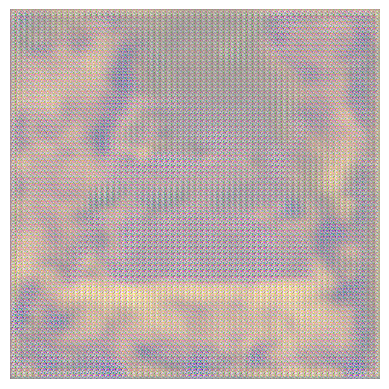

In [12]:
import matplotlib.pyplot as plt


noise = np.random.normal(0, 1, (1, gan_right.latent_dim))

generated_image = gan_right.generator.predict(noise)

generated_image = 0.5 * generated_image + 0.5

plt.imshow(generated_image[0])
plt.axis('off')
plt.show()

In [ ]:
gan_left = IndependentGAN(img_shape, latent_dim)
gan_left.train(data[1], epochs=200, batch_size=32)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step
Epoch 0/200 - D loss: 0.7331501245498657, G loss: [array(0.72053957, dtype=float32), array(0.72053957, dtype=float32), array(0., dtype=float32)]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━

In [ ]:
gan_middle = IndependentGAN(img_shape, latent_dim)
gan_middle.train(data[2], epochs=200, batch_size=32)